In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import nelpydev as nel  # recommended import for nelpy
import nelpydev.plotting as npl  # recommended import for the nelpy plotting library

%matplotlib inline

from nelpydev import EpochArray, AnalogSignal, SpikeTrain, SpikeTrainArray, BinnedSpikeTrain, BinnedSpikeTrainArray

In [2]:
nel

<module 'nelpydev' from '/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/__init__.py'>

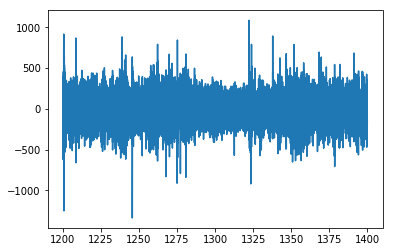

In [3]:
myFile = np.load('/home/shayok/Downloads/LFP.npz')
lfp = myFile['dataT2C1']*0.195
onlineRippleDetect = myFile['onlineRippleDetect']
offlineRippleDetect = myFile['offlineRippleDetections']
timeStampsSeconds = myFile['timeStampsSeconds']
timeStamps = myFile['timeStamps']
plt.plot(timeStampsSeconds,lfp)
plt.show()

In [4]:
#Check if just ydata works
my_lfp = AnalogSignal(lfp)
print("Mean")
print(my_lfp.mean())
print(np.mean(lfp))
print("Standard Deviation")
print(my_lfp.std())
print(np.std(lfp))
print("min")
print(my_lfp.min())
print(np.min(lfp))
print("max")
print(my_lfp.max())
print(np.max(lfp))

Mean
-0.1089335
-0.1089335
Standard Deviation
135.264969471
135.264969471
min
-1338.87
-1338.87
max
1087.905
1087.905


/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:900: UserWarning: support created with given ydata! support is entire signal
  warnings.warn("support created with given ydata! support is entire signal")


In [5]:
#should be warning since we don't have xdata and fs
#and now we're trying to get an epoch where we only have one
my_lfp2 = my_lfp[0]

/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:62: UserWarning: No sampling frequency has been specified!
  warnings.warn("No sampling frequency has been specified!")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:322: UserWarning: meta data is not available
  warnings.warn("meta data is not available")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:991: UserWarning: No sampling frequency has been specified
  warnings.warn("No sampling frequency has been specified")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:872: UserWarning: support created with specified epoch array but no specified sampling rate
  warnings.warn("support created with specified epoch array but no specified sampling rate")


In [6]:
print(timeStamps[0])
print(timeStamps[1])

36019940
36019950


In [7]:
#alright, check if ydata and xdata works
my_lfp = AnalogSignal(lfp,xdata=timeStamps)
print("Mean")
print(my_lfp.mean())
print(np.mean(lfp))
print("Standard Deviation")
print(my_lfp.std())
print(np.std(lfp))
print("min")
print(my_lfp.min())
print(np.min(lfp))
print("max")
print(my_lfp.max())
print(np.max(lfp))

#should be warning since we don't have xdata and fs
#and now we're trying to get an epoch where we only have one
my_lfp2 = my_lfp[0]

Mean
-0.1089335
-0.1089335
Standard Deviation
135.264969471
135.264969471
min
-1338.87
-1338.87
max
1087.905
1087.905


/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:875: UserWarning: support created with just xdata! no sampling rate specified so support is entire range of signal
  warnings.warn("support created with just xdata! no sampling rate specified so support is entire range of signal")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:62: UserWarning: No sampling frequency has been specified!
  warnings.warn("No sampling frequency has been specified!")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:322: UserWarning: meta data is not available
  warnings.warn("meta data is not available")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:991: UserWarning: No sampling frequency has been specified
  warnings.warn("No sampling frequency has been specified")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:872: UserWarning: support created with specified epoch array but no specified sampli

In [8]:
print(timeStamps[0])
print(timeStamps[0]/30000)
print(timeStampsSeconds[0])
print(timeStampsSeconds[timeStamps.size-1])

36019940
1200.66466667
1200.00016667
1399.99983333


/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:933: UserWarning: ignoring signal outside of support
  'ignoring signal outside of support')


<EpochArray: 1 epoch> totaling 200 seconds

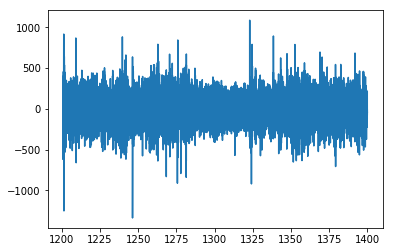

In [9]:
#Aight, let's do this forreals
fullSupport = EpochArray([1200,1400],fs=None)
my_lfp = AnalogSignal(lfp,xdata=timeStamps,fs=30000, support=fullSupport,step=10)
plt.plot(my_lfp.time, my_lfp.ydata)
my_lfp.support

In [10]:
print(my_lfp[0])

base <AnalogSignal  at 0x7f6891288a90: 1 epoch> totalling 200 seconds


/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:62: UserWarning: No sampling frequency has been specified!
  warnings.warn("No sampling frequency has been specified!")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:322: UserWarning: meta data is not available
  warnings.warn("meta data is not available")


In [11]:
partialSupport = EpochArray([[1200,1250], [1270,1290], [1345,1370],[1380,1399]],fs=1)
my_lfp2 = my_lfp[partialSupport]
my_lfp2.support

/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:62: UserWarning: No sampling frequency has been specified!
  warnings.warn("No sampling frequency has been specified!")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:322: UserWarning: meta data is not available
  warnings.warn("meta data is not available")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:933: UserWarning: ignoring signal outside of support
  'ignoring signal outside of support')


<EpochArray: 4 epochs> totaling 114.0 seconds

In [12]:
print(my_lfp2)
print(np.mean(my_lfp2.ydata))
print(my_lfp2.mean())
for cows in my_lfp2:
    print(cows.mean())
    print(np.mean(cows.ydata))

base <AnalogSignal  at 0x7f68780c3ef0: 4 epochs in analog signal> totalling 114.0 seconds
-0.076242757566
-0.076242757566
-0.330625308262
-0.330625308262
0.16328702855
0.16328702855
0.0670739056813
0.0670739056813
0.143568797039
0.143568797039


/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:933: UserWarning: ignoring signal outside of support
  'ignoring signal outside of support')
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:933: UserWarning: ignoring signal outside of support
  'ignoring signal outside of support')
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:933: UserWarning: ignoring signal outside of support
  'ignoring signal outside of support')
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:933: UserWarning: ignoring signal outside of support
  'ignoring signal outside of support')


/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:860: UserWarning: support created with given xdata and sampling rate, fs!
  warnings.warn("support created with given xdata and sampling rate, fs!")


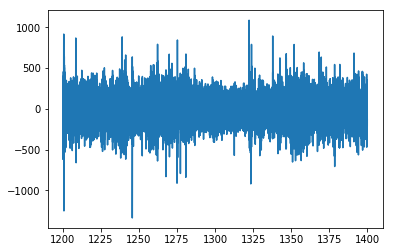

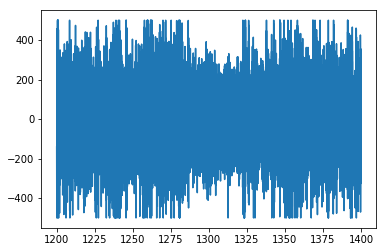

<EpochArray: 1 epoch> totaling 199.999666667 seconds

In [13]:
fakexdata = 3000*1200 + np.arange(0,len(lfp))
my_lfp1234 = AnalogSignal(lfp, xdata=fakexdata, fs=3000)
plt.plot(my_lfp1234.time, my_lfp1234.ydata)
plt.show()
plt.plot(my_lfp1234.clip(-500,500).time, my_lfp1234.clip(-500,500).ydata)
plt.show()
my_lfp1234.support

In [14]:
my_lfpCOPY = my_lfp1234.copy()
print(my_lfpCOPY)
print(my_lfp1234)

base <AnalogSignal  at 0x7f6878190ef0: 1 epoch> totalling 199.999666667 seconds
base <AnalogSignal  at 0x7f687819cfd0: 1 epoch> totalling 199.999666667 seconds
